In [1]:
import gym
import matplotlib.pyplot as plt
import numpy as np
from reinforce import PolicyGradientAgent

In [6]:
def plot_learning_curve(scores, x):
    running_avg = np.zeros(len(scores))
    for i in range(len(running_avg)):
        running_avg[i] = np.mean(scores[max(0, i-100):(i+1)])
    plt.plot(x, running_avg)
    plt.title('Running average of previous 100 scores')

In [3]:
if __name__ == '__main__':
    env = gym.make('CartPole-v0')
    n_games = 3001
    agent = PolicyGradientAgent(gamma=0.99, lr=0.0005, input_dims=(env.observation_space.shape),
                                n_actions=env.action_space.n, fc1_dims=128, fc2_dims=128)

    scores = []
    for i in range(n_games):
        done = False
        observation = env.reset()
        score = 0
        while not done:
            action = agent.choose_action(observation)
            observation_, reward, done, info = env.step(action)
            score += reward
            agent.store_rewards(reward)
            observation = observation_
        agent.learn()
        scores.append(score)

        avg_score = np.mean(scores[-100:])
        print('episode ', i, 'score %.2f' % score,
                'average score %.2f' % avg_score)

c:\Users\Lenovo\Desktop\Python\Reinforcement Learning\4. Policy gradient\REINFORCE\PyTorch\reinforce.py:25: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(self.fc3(x))


episode  0 score 24.00 average score 24.00
episode  1 score 12.00 average score 18.00
episode  2 score 15.00 average score 17.00
episode  3 score 13.00 average score 16.00
episode  4 score 10.00 average score 14.80
episode  5 score 18.00 average score 15.33
episode  6 score 16.00 average score 15.43
episode  7 score 28.00 average score 17.00
episode  8 score 15.00 average score 16.78
episode  9 score 35.00 average score 18.60
episode  10 score 18.00 average score 18.55
episode  11 score 13.00 average score 18.08
episode  12 score 26.00 average score 18.69
episode  13 score 16.00 average score 18.50
episode  14 score 30.00 average score 19.27
episode  15 score 24.00 average score 19.56
episode  16 score 10.00 average score 19.00
episode  17 score 20.00 average score 19.06
episode  18 score 23.00 average score 19.26
episode  19 score 26.00 average score 19.60
episode  20 score 19.00 average score 19.57
episode  21 score 24.00 average score 19.77
episode  22 score 24.00 average score 19.9

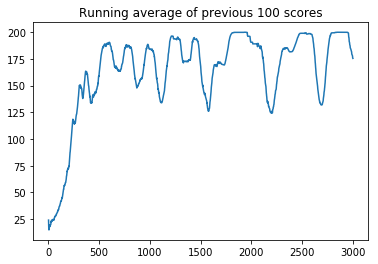

In [7]:
x = [i+1 for i in range(len(scores))]
plot_learning_curve(scores, x)